In [189]:
scenario_folder = '/Users/rajiv/Development/iora/python/openroad/ride_hailing/apps/scenario'
input_data_folder = f"{scenario_folder}/comfort_delgro_2017/20171201"

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import plotly.express as px
import plotly, os
plotly.io.renderers.default= 'png'


In [90]:
order_df = pd.read_csv(f"{input_data_folder}/Order_Sample.csv", 
                       parse_dates=['Start_Time', 'End_Time'])

order_df.dropna(inplace=True)

order_df['Trip_start_DT'] = pd.to_datetime(order_df['Trip_start_DT'], format='%d/%m/%Y %H:%M', errors='coerce')
order_df['Trip_end_DT'] = pd.to_datetime(order_df['Trip_end_DT'], format='%d/%m/%Y %H:%M', errors='coerce')

order_redux_df = order_df[(order_df['Trip_start_DT'] >= datetime(2016, 12, 1, 4, 0, 0)) & \
                         (order_df['Trip_start_DT'] < datetime(2016, 12, 1, 12, 0, 0))]

order_sample_df = order_redux_df.sample(frac=0.1)


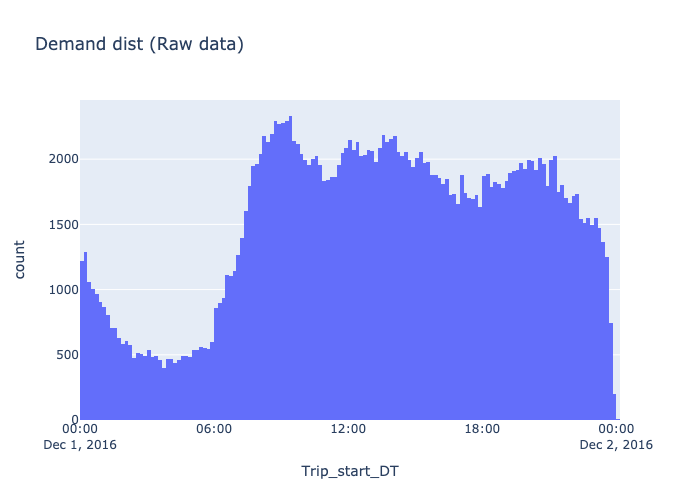

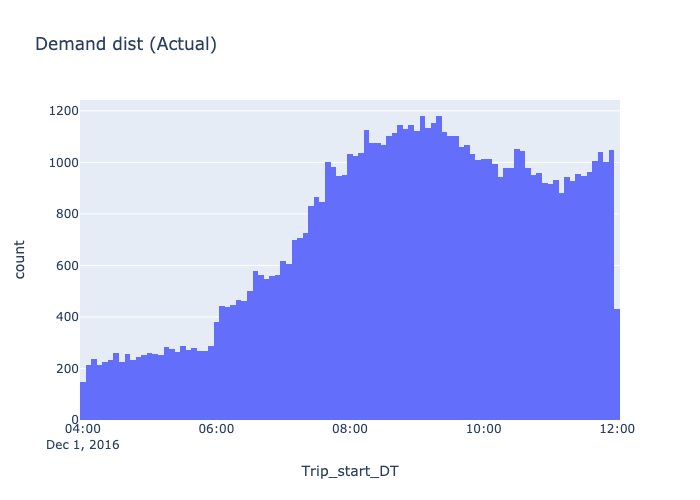

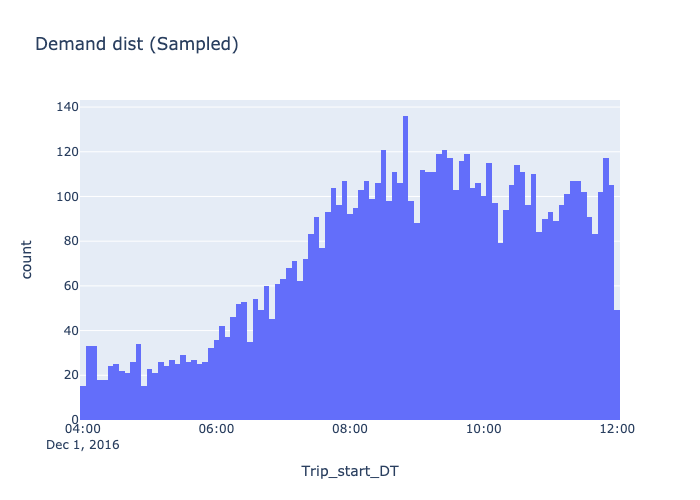

In [256]:
# order_df['Trip_start_DT'].min(), order_df['Trip_start_DT'].max()
# order_df.dtypes

plotly.io.renderers.default= 'png'
px.histogram(order_df[order_df['Trip_start_DT'] <= datetime(2016, 12, 2)], 
             x='Trip_start_DT',
             title='Demand dist (Raw data)'
            ).show()
plotly.io.renderers.default= 'png'
px.histogram(order_redux_df, x='Trip_start_DT', 
             title='Demand dist (Actual)',
             nbins=128,
            ).show()

plotly.io.renderers.default= 'png'
px.histogram(order_sample_df, x='Trip_start_DT', 
             title='Demand dist (Sampled)',
             nbins=128,
            ).show()

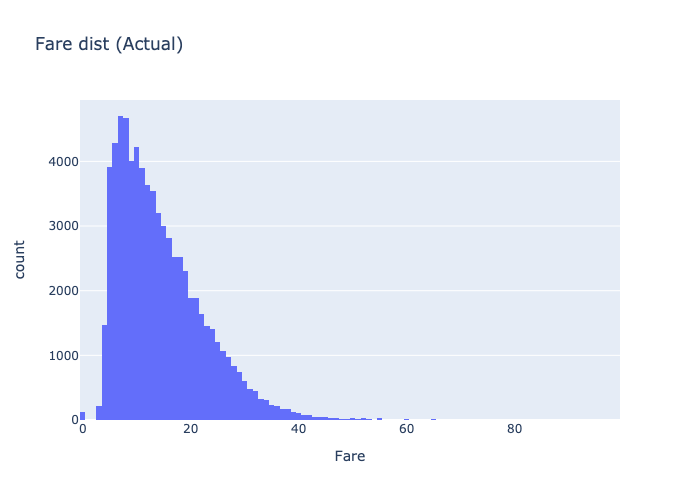

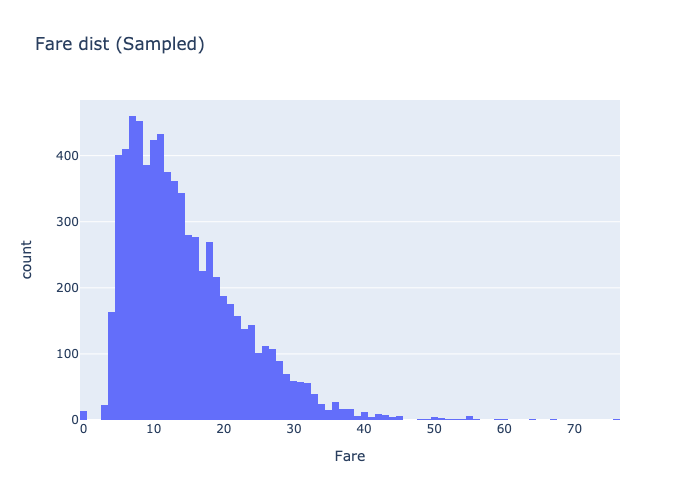

In [258]:
# order_redux_df = order_df[(order_df['Trip_start_DT'] >= datetime(2016, 12, 1, 4, 0, 0)) & \
#                          (order_df['Trip_start_DT'] < datetime(2016, 12, 1, 12, 0, 0))]

plotly.io.renderers.default= 'png'
px.histogram(order_redux_df[order_redux_df['Fare'] < 100], x='Fare', 
             title='Fare dist (Actual)',
             nbins=128,
            ).show()

plotly.io.renderers.default= 'png'
px.histogram(order_sample_df[order_sample_df['Fare'] < 100], x='Fare', 
             title='Fare dist (Sampled)',
             nbins=128,
            ).show()

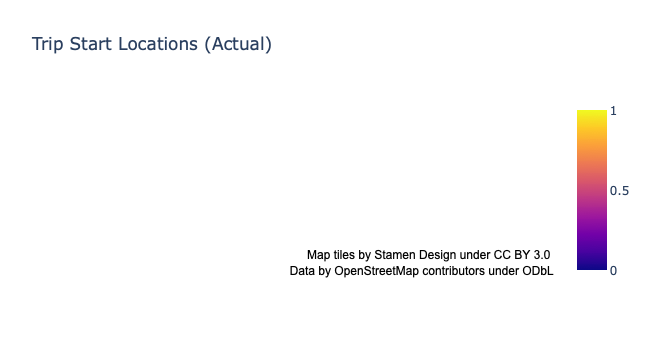

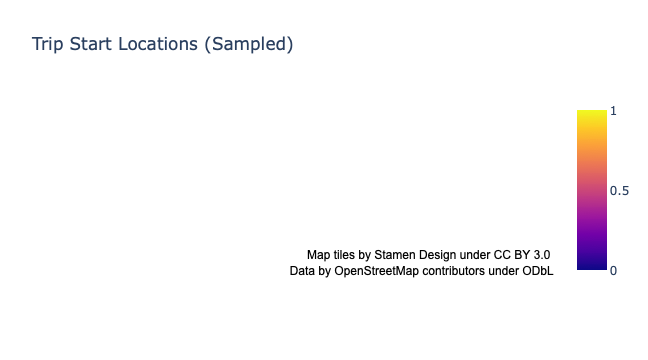

In [212]:
plotly.io.renderers.default= 'jupyterlab'

px.density_mapbox(order_redux_df, 
                  lat='Start_Latitude', lon='Start_Longitude', radius=1, 
                  mapbox_style="stamen-terrain",
                  title='Trip Start Locations (Actual)').show()

px.density_mapbox(order_sample_df, 
                  lat='Start_Latitude', lon='Start_Longitude', radius=2, 
                  mapbox_style="stamen-terrain",
                  title='Trip Start Locations (Sampled)').show()

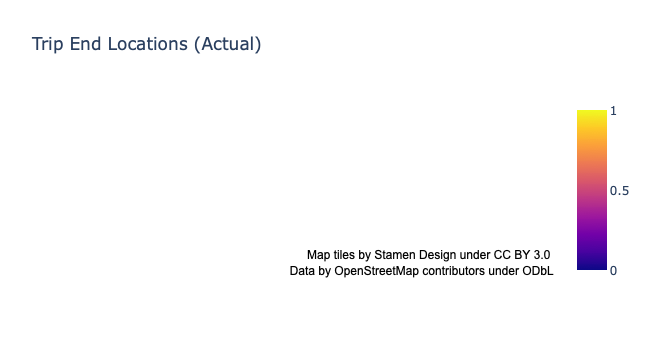

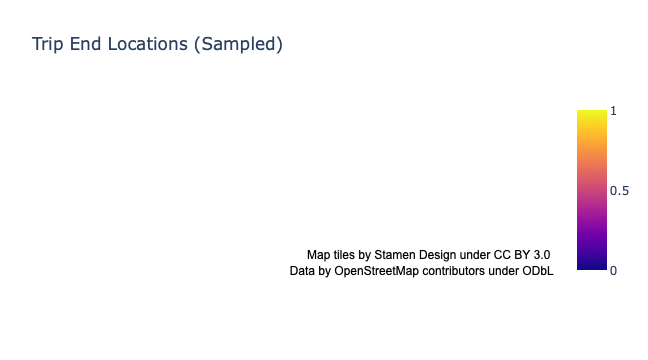

In [255]:
plotly.io.renderers.default= 'jupyterlab'

px.density_mapbox(order_redux_df, 
                  lat='End_Latitude', lon='End_Longitude', radius=1, 
                  mapbox_style="stamen-terrain",
                  title='Trip End Locations (Actual)').show()

px.density_mapbox(order_sample_df, 
                  lat='End_Latitude', lon='End_Longitude', radius=2, 
                  mapbox_style="stamen-terrain",
                  title='Trip End Locations (Sampled)').show()

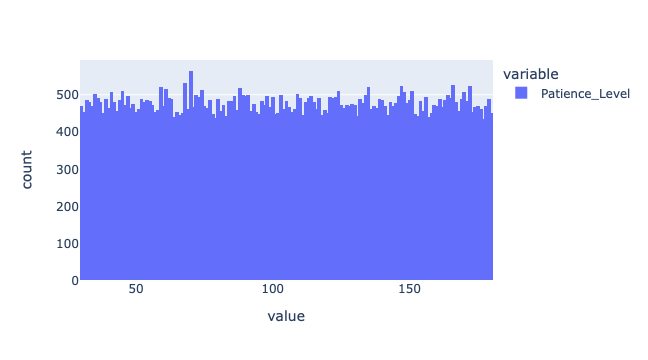

In [214]:
px.histogram(order_redux_df.Patience_Level)

In [122]:
driver_df = pd.read_csv(f"{input_data_folder}/Driver_Sample.csv",)
                       # parse_dates=['Start_Time', 'End_Time', 'Schedule_Date'])
driver_df.dropna(inplace=True)




In [123]:
driver_df['Start_Time'] = driver_df['Schedule_Date'] + ' ' + driver_df['Start_Time']
driver_df['End_Time'] = driver_df['Schedule_Date'] + ' ' + driver_df['End_Time']

driver_df['Start_Time'] = pd.to_datetime(driver_df['Start_Time'], format='%d/%m/%Y %H:%M:%S')
driver_df['End_Time'] = pd.to_datetime(driver_df['End_Time'], format='%d/%m/%Y %H:%M:%S')

driver_df['Start_Time'] = driver_df['Start_Time'] - pd.DateOffset(days=1)
driver_df['End_Time'] = driver_df['End_Time'] - pd.DateOffset(days=1)

driver_redux_df = driver_df[(driver_df['Start_Time'] <= datetime(2016, 12, 1, 12, 0, 0)) & \
         (driver_df['End_Time'] >= datetime(2016, 12, 1, 5, 0, 0))]

driver_sample_df = driver_redux_df.sample(frac=0.15)





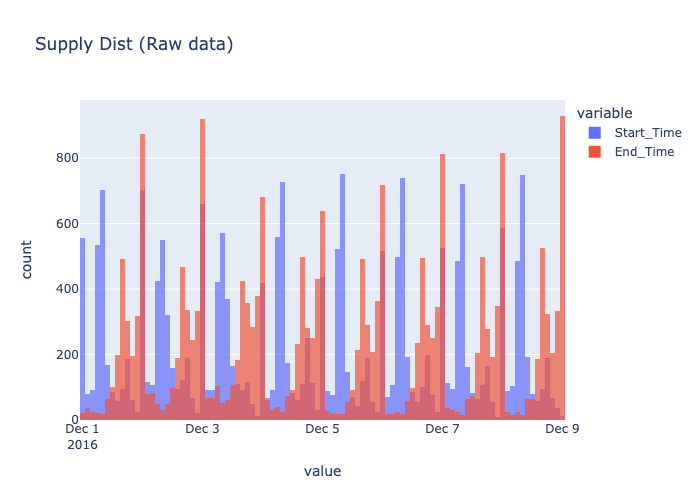

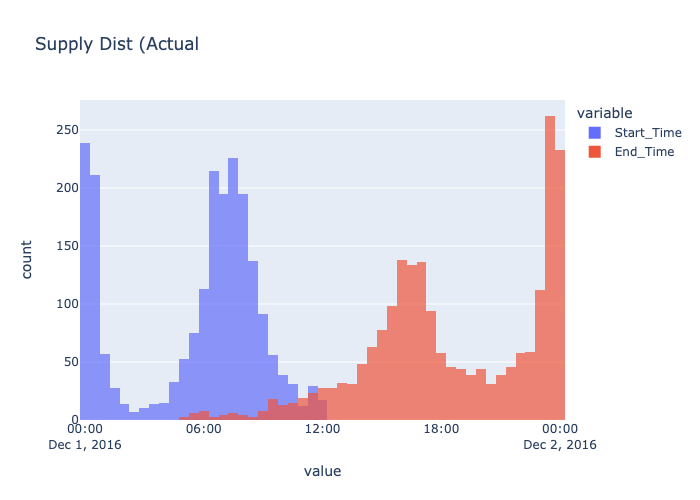

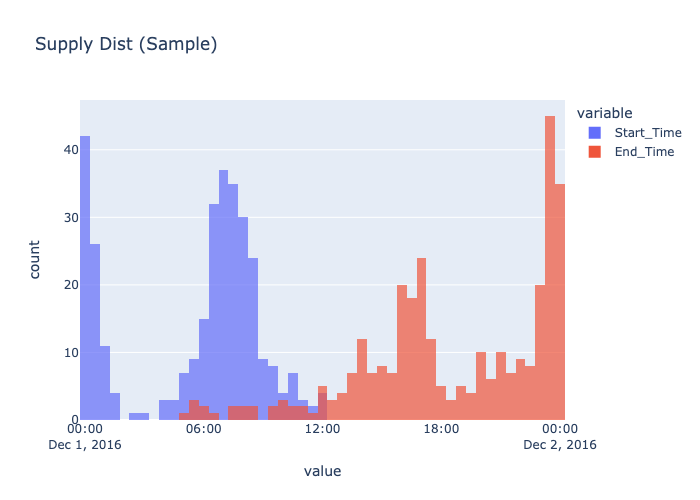

In [259]:
plotly.io.renderers.default= 'png'
px.histogram(driver_df, x=['Start_Time', 'End_Time'],
             barmode='overlay',
             opacity=0.7,
             title='Supply Dist (Raw data)',
            ).show()
plotly.io.renderers.default= 'png'
px.histogram(driver_redux_df, x=['Start_Time', 'End_Time'],
             barmode='overlay',
             opacity=0.7,
             title='Supply Dist (Actual)',
             nbins=64,
            ).show()

plotly.io.renderers.default= 'png'
px.histogram(driver_sample_df, x=['Start_Time', 'End_Time'],
             barmode='overlay',
             opacity=0.7,
             title='Supply Dist (Sample)',
             nbins=64,
            ).show()

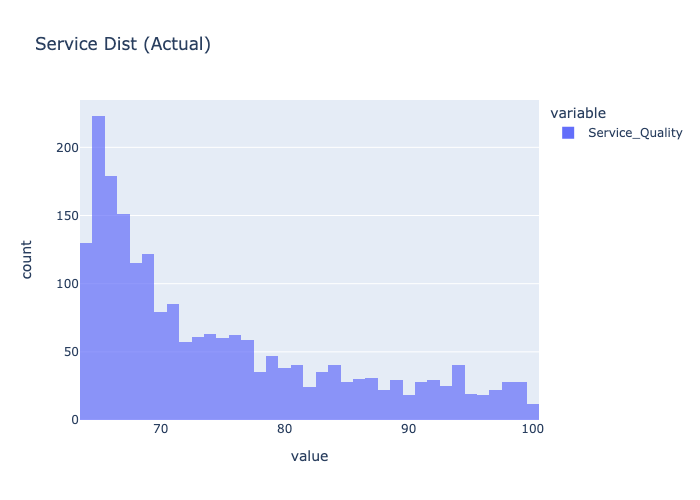

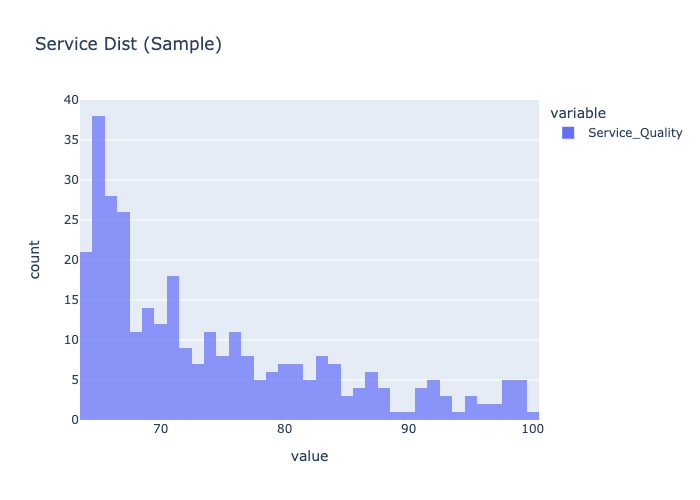

In [260]:
# driver_redux_df = driver_df[(driver_df['Start_Time'] <= datetime(2016, 12, 1, 12, 0, 0)) & \
#          (driver_df['End_Time'] >= datetime(2016, 12, 1, 5, 0, 0))]

plotly.io.renderers.default= 'png'
px.histogram(driver_redux_df, x=['Service_Quality'],
             barmode='overlay',
             opacity=0.7,
             title='Service Dist (Actual)',
             nbins=64,
            ).show()

plotly.io.renderers.default= 'png'
px.histogram(driver_sample_df, x=['Service_Quality'],
             barmode='overlay',
             opacity=0.7,
             title='Service Dist (Sample)',
             nbins=64,
            ).show()

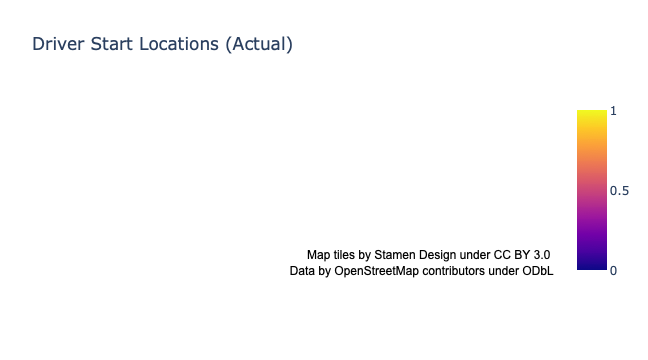

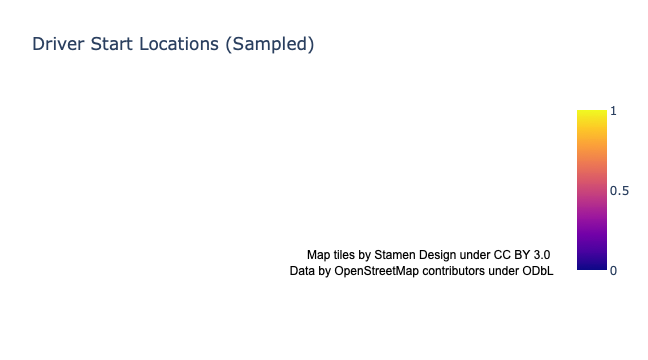

In [213]:
plotly.io.renderers.default= 'jupyterlab'

px.density_mapbox(driver_redux_df, 
                  lat='Start_Latitude', lon='Start_Longitude', radius=5, 
                  mapbox_style="stamen-terrain",
                  title='Driver Start Locations (Actual)').show()

px.density_mapbox(driver_sample_df, 
                  lat='Start_Latitude', lon='Start_Longitude', radius=5, 
                  mapbox_style="stamen-terrain",
                  title='Driver Start Locations (Sampled)').show()

In [276]:
(driver_redux_df.Start_Time.count(), 
 driver_sample_df.Start_Time.count(), 
 order_redux_df.Start_Time.count(), 
 order_sample_df.Start_Time.count(),)



(2112, 317, 71877, 7188)

In [277]:
export_folder = f"{scenario_folder}/processed_input"
scenario_name = "comfort_delgro_sampled_10pct_20211123_b"

if not os.path.exists(f"{export_folder}/{scenario_name}"):
    os.makedirs(f"{export_folder}/{scenario_name}")
    
    driver_sample_df.to_csv(f"{export_folder}/{scenario_name}/driver.csv", 
                           index=False)
    order_sample_df.to_csv(f"{export_folder}/{scenario_name}/passenger.csv", 
                           index=False)



In [193]:
driver_sample_df.columns

Index(['No', 'Driver_ID', 'Start_Time', 'Start_Post', 'Start_Latitude',
       'Start_Longitude', 'End_Time', 'End_Post', 'End_Latitude',
       'End_Longitude', 'Schedule_Date', 'Service_Quality', 'Start_Slot',
       'End_Slot', 'DistrictCode'],
      dtype='object')

In [215]:
order_sample_df.columns

Index(['No', 'Booking_ID', 'Vehicle_ID', 'Driver_ID', 'Trip_start_DT',
       'Trip_end_DT', 'Start_Post', 'End_Post', 'Start_Latitude',
       'Start_Longitude', 'End_Latitude', 'End_Longitude', 'Fare', 'Distance',
       'Order_Type', 'Start_Time', 'End_Time', 'Start_Slot', 'End_Slot',
       'Patience_Level', 'DistrictCode'],
      dtype='object')

In [278]:
import json
import_folder = '/Users/rajiv/Development/iora/python/openroad/ride_hailing/apps/scenario/dataset/comfort_delgro_sampled_10pct_20211123_b_pickup_optimal'



In [279]:
with open (f"{import_folder}/driver_behavior.json") as fp:
    driver = json.load(fp)
    
driver_list = [v for _, v in driver.items()]
ddf = pd.DataFrame(driver_list)
ddf.describe()


RESPONSE_RATE  STEPS_PER_ACTION  shift_end_time  shift_start_time  \
count          317.0             317.0      317.000000        317.000000   
mean             1.0               1.0      927.473186        309.618297   
std              0.0               0.0      133.402563        244.807059   
min              1.0               1.0      120.000000          0.000000   
25%              1.0               1.0      960.000000          0.000000   
50%              1.0               1.0      960.000000        335.000000   
75%              1.0               1.0      960.000000        471.000000   
max              1.0               1.0      960.000000        954.000000   

       transition_time_dropoff  transition_time_pickup  
count                    317.0                   317.0  
mean                       0.0                     0.0  
std                        0.0                     0.0  
min                        0.0                     0.0  
25%                        0.0                     0.0  
50%                        0.0                     0.0  
75%                        0.0                     0.0  
max                        0.0                     0.0

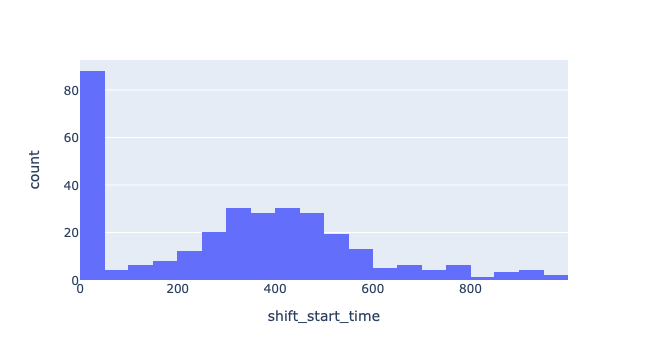

In [285]:
px.histogram(ddf, 'shift_start_time', nbins=30)

In [281]:
with open (f"{import_folder}/passenger_behavior.json") as fp:
    passenger = json.load(fp)
    
passenger_list = [v for _, v in passenger.items()]
pdf = pd.DataFrame(passenger_list)
pdf.describe()



RESPONSE_RATE  STEPS_PER_ACTION   trip_price  trip_request_time
count         7188.0            7188.0  7188.000000        7188.000000
mean             1.0               1.0    14.480237         591.859905
std              0.0               0.0     8.296809         232.177469
min              1.0               1.0     0.000000           0.000000
25%              1.0               1.0     8.250000         440.000000
50%              1.0               1.0    12.550000         612.000000
75%              1.0               1.0    18.900000         779.000000
max              1.0               1.0   113.850000         959.000000

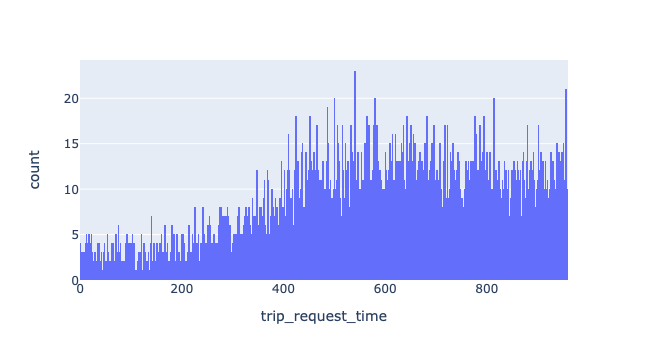

In [282]:
plotly.io.renderers.default= 'jupyterlab'

px.histogram(pdf, 'trip_request_time', nbins=960)


In [275]:
order_sample_df['Trip_end_DT']

54281    2016-12-01 07:54:00
60301    2016-12-01 08:01:00
123833   2016-12-01 11:48:00
43122    2016-12-01 06:28:00
91166    2016-12-01 09:59:00
                 ...        
131817   2016-12-01 12:02:00
95653    2016-12-01 10:22:00
42143    2016-12-01 06:19:00
103759   2016-12-01 10:19:00
65370    2016-12-01 08:26:00
Name: Trip_end_DT, Length: 7188, dtype: datetime64[ns]